In [1]:
from agents import Agent, RandomAgent, HumanInput, EndAgent, RLAgent
from states import GameState, TOAD, FROG, BLANK
from game import run_game_loop, simulate_many_games, plot_losses

import random as rand
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch
import matplotlib.pyplot as plt
import time


In [2]:
initial_position = [TOAD] * 4 + [BLANK] * 6 + [FROG] * 4
G = GameState(initial_position, starting_player=TOAD)

In [3]:
rl_agent = RLAgent(G, TOAD, agent_name='toad_rl', filename='toad_rl464.pth', batch_size=128, lr=1e-4, target_update_freq=20)
rl_agent.load_checkpoint('toad_rl464.pth')
random_frog = RandomAgent(G, FROG)

Training toad_rl 0.0% complete...
Training toad_rl 1.0% complete...
Training toad_rl 2.0% complete...
Training toad_rl 3.0% complete...
Training toad_rl 4.0% complete...
Training toad_rl 5.0% complete...
Training toad_rl 6.0% complete...
Training toad_rl 7.0% complete...
Training toad_rl 8.0% complete...
Training toad_rl 9.0% complete...
Training toad_rl 10.0% complete...
Training toad_rl 11.0% complete...
Training toad_rl 12.0% complete...
Training toad_rl 13.0% complete...
Training toad_rl 14.0% complete...
Training toad_rl 15.0% complete...
Training toad_rl 16.0% complete...
Training toad_rl 17.0% complete...
Training toad_rl 18.0% complete...
Training toad_rl 19.0% complete...
Training toad_rl 20.0% complete...
Training toad_rl 21.0% complete...
Training toad_rl 22.0% complete...
Training toad_rl 23.0% complete...
Training toad_rl 24.0% complete...
Training toad_rl 25.0% complete...
Training toad_rl 26.0% complete...
Training toad_rl 27.0% complete...
Training toad_rl 28.0% complet

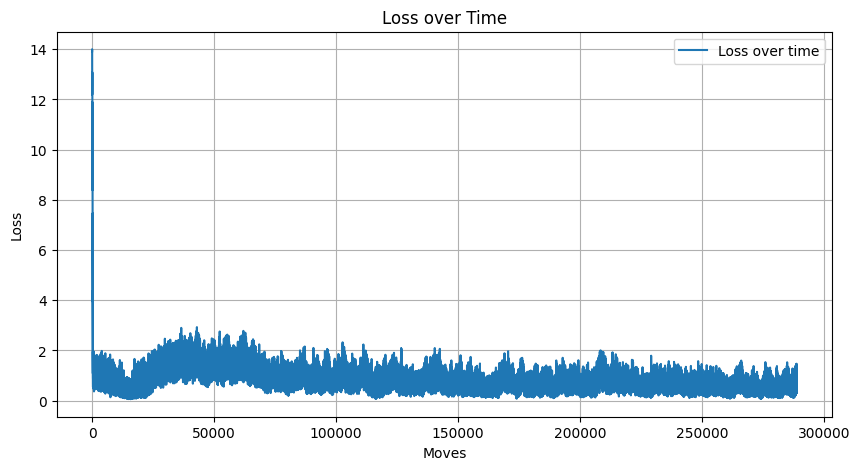

In [16]:
losses = rl_agent.train(opponent=random_frog, num_episodes=20000, save_model=True, start_epsilon=0.5, end_epsilon=0)
plot_losses(losses)

tensor([[  6.8657, -13.9558, -26.0384, -23.4314]])
1
tensor([[  7.8735,   6.3455,  -8.7295, -15.8876]])
1
tensor([[  6.7521,   8.9418,  -1.2595, -27.6576]])
2
tensor([[  7.3535,   5.1328,   5.9588, -23.1530]])
1
tensor([[  8.3464,   6.4985,   5.0510, -19.6352]])
1
tensor([[  2.7087,   9.3990,   0.3596, -19.6183]])
2
tensor([[ -0.3719,   7.7030, -51.6909, -51.5222]])
2
tensor([[-3.7530,  0.6523,  7.8888, -8.3756]])
3
tensor([[  7.2803,  -2.9875,  -1.3852, -10.7904]])
1
tensor([[-1.8465, -0.6378,  4.8648, -7.9022]])
3
tensor([[-12.8485,  -8.3882,   8.1738,   1.3661]])
3
tensor([[-12.1892,  -9.3402,  11.1269,   3.6795]])
3
tensor([[ 0.4664, -2.8090, -6.2600, 15.8276]])
4
tensor([[ 17.7595, -13.8477, -33.1368,  14.3856]])
1
tensor([[ 18.4866, -18.2252, -22.5259,  19.8368]])
4
tensor([[ 22.1279, -17.7155, -15.0322,  20.6267]])
1
tensor([[ 18.3859, -13.7085, -14.1439,  24.7457]])
4
tensor([[ 27.0777, -11.0071, -38.8834,   5.3599]])
1
tensor([[ 30.0793, -16.1055, -39.0885,  12.5143]])
1
tenso

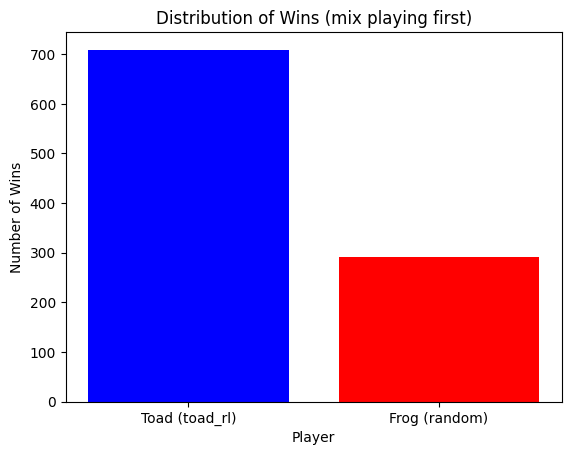

In [4]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, G, rl_agent, random_frog,
                                starting_player=starting_player, verbose=False, plot=True)

In [18]:
run_game_loop(G, rl_agent, random_frog, verbose=True)

Initializing game between toad_rl as Toads and random as Frogs...
|T|T|T|T| | | | | | |F|F|F|F|
tensor([[  7.0109, -13.0718, -26.7467, -12.3834]])
1
toad_rl makes move 1
|T|T|T| |T| | | | | |F|F|F|F|
random makes move 1
|T|T|T| |T| | | | |F| |F|F|F|
tensor([[ 7.2759,  7.4766, -8.0194, -9.7738]])
2
toad_rl makes move 2
|T|T| |T|T| | | | |F| |F|F|F|
random makes move 2
|T|T| |T|T| | | | |F|F| |F|F|
tensor([[ 9.4576, -4.7237,  0.0149, -6.7721]])
1
toad_rl makes move 1
|T|T| |T| |T| | | |F|F| |F|F|
random makes move 3
|T|T| |T| |T| | | |F|F|F| |F|
tensor([[ 9.4729, 10.5647,  8.8169, -7.6170]])
2
toad_rl makes move 2
|T|T| | |T|T| | | |F|F|F| |F|
random makes move 4
|T|T| | |T|T| | | |F|F|F|F| |
tensor([[11.0129,  5.1563, 11.6589, -1.0186]])
3
toad_rl makes move 3
|T| |T| |T|T| | | |F|F|F|F| |
random makes move 1
|T| |T| |T|T| | |F| |F|F|F| |
tensor([[13.0140,  2.8489,  3.6383,  2.5348]])
1
toad_rl makes move 1
|T| |T| |T| |T| |F| |F|F|F| |
random makes move 2
|T| |T| |T| |T| |F|F| |F|F| |


True

# I play the trained agent

In [8]:
me = HumanInput(G, FROG, 'logan')
run_game_loop(G, rl_agent, me, verbose=True)

Initializing game between toad_rl as Toads and logan as Frogs...
|T|T|T|T|T|T| | | | | | | | | |F|F|F|F|F|F|
tensor([[ -0.6635,  -2.2042, -10.6080, -13.0324, -15.9726, -17.6946]])
1
toad_rl makes move 1
|T|T|T|T|T| |T| | | | | | | | |F|F|F|F|F|F|
logan makes move 1
|T|T|T|T|T| |T| | | | | | | |F| |F|F|F|F|F|
tensor([[ -0.8160,  -2.9871, -11.7733, -14.2789, -16.9412, -17.8098]])
1
toad_rl makes move 1
|T|T|T|T|T| | |T| | | | | | |F| |F|F|F|F|F|
logan makes move 1
|T|T|T|T|T| | |T| | | | | |F| | |F|F|F|F|F|
tensor([[ -0.9610,  -2.2255, -11.6651, -12.7880, -15.5537, -14.9748]])
1
toad_rl makes move 1
|T|T|T|T|T| | | |T| | | | |F| | |F|F|F|F|F|
logan makes move 1
|T|T|T|T|T| | | |T| | | |F| | | |F|F|F|F|F|
tensor([[ -1.2239,  -2.7630,  -8.9816, -12.4077, -16.5029, -17.4739]])
1
toad_rl makes move 1
|T|T|T|T|T| | | | |T| | |F| | | |F|F|F|F|F|
logan makes move 1
|T|T|T|T|T| | | | |T| |F| | | | |F|F|F|F|F|
tensor([[ -1.6524,  -2.8215, -11.1885, -15.4742, -18.4701, -17.8852]])
1
toad_rl makes 

False

It beat me...

# Train a Frog agent for the same amount of time against a random opponent

In [4]:
H = GameState(initial_position, FROG)

In [5]:
rl_agent2 = RLAgent(H, TOAD, agent_name='frog_rl', filename='frog_rl696.pth', batch_size=128, lr=1e-4, target_update_freq=20)
random_toad = RandomAgent(H, TOAD)

Training frog_rl 0.0% complete...
Training frog_rl 4.0% complete...
Training frog_rl 8.0% complete...
Training frog_rl 12.0% complete...
Training frog_rl 16.0% complete...
Training frog_rl 20.0% complete...
Training frog_rl 24.0% complete...
Training frog_rl 28.0% complete...
Training frog_rl 32.0% complete...
Training frog_rl 36.0% complete...
Training frog_rl 40.0% complete...
Training frog_rl 44.0% complete...
Training frog_rl 48.0% complete...
Training frog_rl 52.0% complete...
Training frog_rl 56.0% complete...
Training frog_rl 60.0% complete...
Training frog_rl 64.0% complete...
Training frog_rl 68.0% complete...
Training frog_rl 72.0% complete...
Training frog_rl 76.0% complete...
Training frog_rl 80.0% complete...
Training frog_rl 84.0% complete...
Training frog_rl 88.0% complete...
Training frog_rl 92.0% complete...
Training frog_rl 96.0% complete...
Training finished!


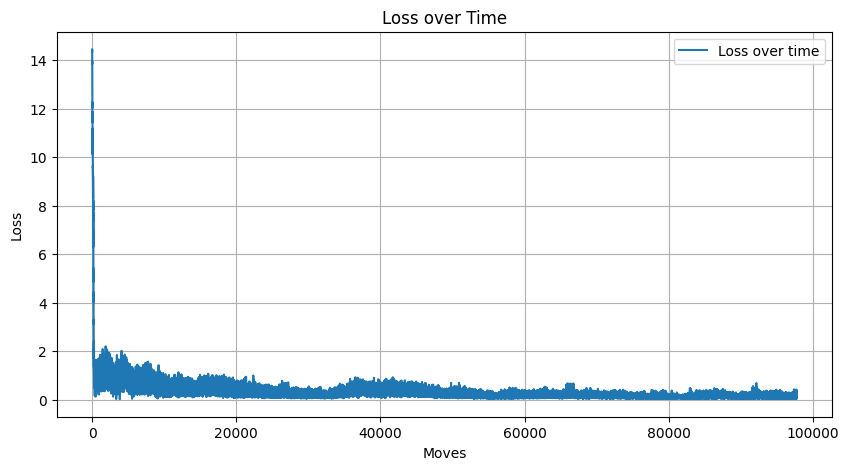

In [11]:
losses2 = rl_agent2.train(opponent=random_toad, num_episodes=5000, start_epsilon=0.5, end_epsilon=0)
plot_losses(losses2)

tensor([[ -1.2892,  -1.6942, -14.5305, -20.2003, -14.1816, -15.2579]])
1
tensor([[ -1.1706,  -1.6887, -15.3364, -20.8627, -14.2717, -14.8870]])
1
tensor([[ -1.1210,  -1.8279, -14.9444, -19.5417, -14.8497, -15.0114]])
1
tensor([[ -1.3880,  -1.9212, -13.1301, -16.8043, -12.4427, -14.2794]])
1
tensor([[ -1.2209,  -1.8885, -13.0077, -17.2810, -13.6063, -14.6794]])
1
tensor([[ -1.3021,  -2.1717, -12.8134, -16.5230, -12.1659, -12.4603]])
1
tensor([[ -1.7762,  -1.9665, -10.0855, -14.0977, -12.2804, -12.0984]])
1
tensor([[ -2.8922,  -1.9408,  -8.6976, -14.2159, -14.9978, -13.9281]])
2
tensor([[ -2.9326,  -1.8852,  -5.7717, -12.8185, -14.0265, -13.0444]])
2
tensor([[ -2.5181,  -2.6166,  -6.2128, -12.4578, -14.4156, -11.6919]])
1
tensor([[ -4.9017,  -2.5335,  -3.4471,  -9.5760, -14.2453, -10.4990]])
2
tensor([[ -5.1260,  -2.4746,  -3.4085,  -9.1727, -14.5254, -10.8207]])
2
tensor([[ -8.1564,  -2.8043,  -3.2524,  -6.7993, -13.4270, -11.2394]])
2
tensor([[ -7.2078,  -3.0442,  -3.4833,  -5.9932, -1

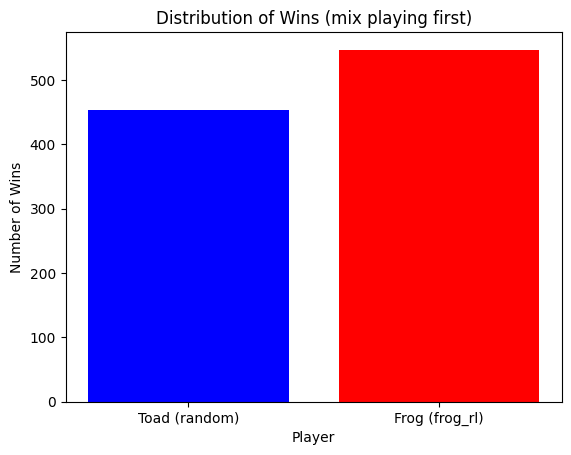

In [12]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, H, random_toad, rl_agent2,
                                starting_player=starting_player, verbose=False, plot=True)

In [38]:
run_game_loop(H, random_toad, rl_agent2, verbose=True)

Initializing game between random as Toads and frog_rl as Frogs...
|T|T|T|T|T|T| | | | | | | | | |F|F|F|F|F|F|
random makes move 1
|T|T|T|T|T|T| | | | | | | | |F| |F|F|F|F|F|
tensor([[ -0.8369,  -1.7592, -17.5370, -23.3959, -14.8797, -15.5144]])
1
frog_rl makes move 1
|T|T|T|T|T| |T| | | | | | | |F| |F|F|F|F|F|
random makes move 2
|T|T|T|T|T| |T| | | | | | | |F|F| |F|F|F|F|
tensor([[ -1.1250,  -1.8943, -13.5468, -20.7241, -14.9523, -14.0657]])
1
frog_rl makes move 1
|T|T|T|T|T| | |T| | | | | | |F|F| |F|F|F|F|
random makes move 1
|T|T|T|T|T| | |T| | | | | |F| |F| |F|F|F|F|
tensor([[ -1.6101,  -1.9621, -12.1402, -19.2016, -13.2413, -13.0715]])
1
frog_rl makes move 1
|T|T|T|T|T| | | |T| | | | |F| |F| |F|F|F|F|
random makes move 1
|T|T|T|T|T| | | |T| | | |F| | |F| |F|F|F|F|
tensor([[ -1.7417,  -2.1864, -11.1604, -17.8125, -12.4303, -14.7349]])
1
frog_rl makes move 1
|T|T|T|T|T| | | | |T| | |F| | |F| |F|F|F|F|
random makes move 2
|T|T|T|T|T| | | | |T| | |F| |F| | |F|F|F|F|
tensor([[ -1.6550,

True

# Train new models by playing the previously trained ones

In [6]:
toad_self_play = RLAgent(G, TOAD, 'toad_self_play', 'toad_self_696', lr=1e-4, batch_size=128, target_update_freq=20)
toad_self_play.load_checkpoint('toad_rl696.pth')
frog_self_play = RLAgent(H, FROG, 'frog_self_play', 'frog_self_696', lr=1e-4, batch_size=128, target_update_freq=20)
frog_self_play.load_checkpoint('frog_rl696.pth')

toad_first = run_game_loop(G, rl_agent, rl_agent2, verbose=True)
frog_first = run_game_loop(H, rl_agent, rl_agent2, verbose=True)
print("toad_first", toad_first)
print("frog_first", frog_first)

Initializing game between toad_rl as Toads and frog_rl as Frogs...
|T|T|T|T|T|T| | | | | | | | | |F|F|F|F|F|F|
toad_rl makes move 1
|T|T|T|T|T| |T| | | | | | | | |F|F|F|F|F|F|
frog_rl makes move 1
|T|T|T|T|T| |T| | | | | | | |F| |F|F|F|F|F|
toad_rl makes move 2
|T|T|T|T| |T|T| | | | | | | |F| |F|F|F|F|F|
frog_rl makes move 1
|T|T|T|T| |T|T| | | | | | |F| | |F|F|F|F|F|
toad_rl makes move 1
|T|T|T|T| |T| |T| | | | | |F| | |F|F|F|F|F|
frog_rl makes move 2
|T|T|T|T| |T| |T| | | | | |F| |F| |F|F|F|F|
toad_rl makes move 3
|T|T|T| |T|T| |T| | | | | |F| |F| |F|F|F|F|
frog_rl makes move 2
|T|T|T| |T|T| |T| | | | | |F|F| | |F|F|F|F|
toad_rl makes move 1
|T|T|T| |T|T| | |T| | | | |F|F| | |F|F|F|F|
frog_rl makes move 1
|T|T|T| |T|T| | |T| | | |F| |F| | |F|F|F|F|
toad_rl makes move 2
|T|T|T| |T| |T| |T| | | |F| |F| | |F|F|F|F|
frog_rl makes move 2
|T|T|T| |T| |T| |T| | | |F|F| | | |F|F|F|F|
toad_rl makes move 1
|T|T|T| |T| |T| | |T| | |F|F| | | |F|F|F|F|
frog_rl makes move 3
|T|T|T| |T| |T| | |T| |

toad_self_play losses for epoch 0


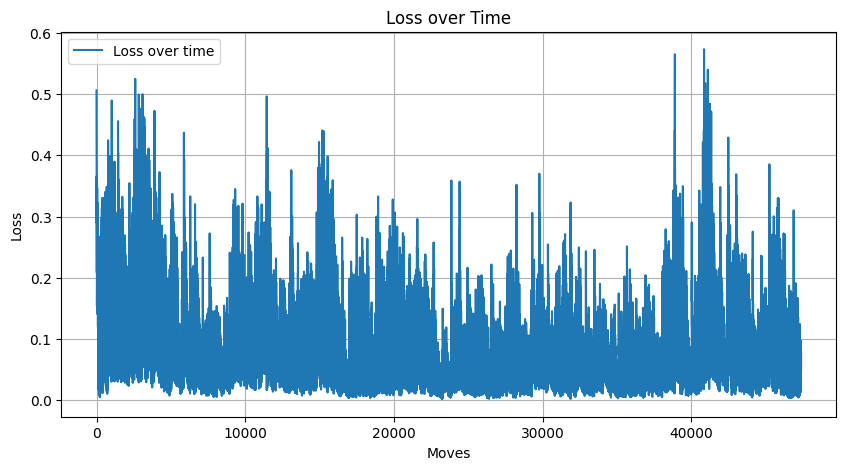

frog_self_play losses for epoch 0


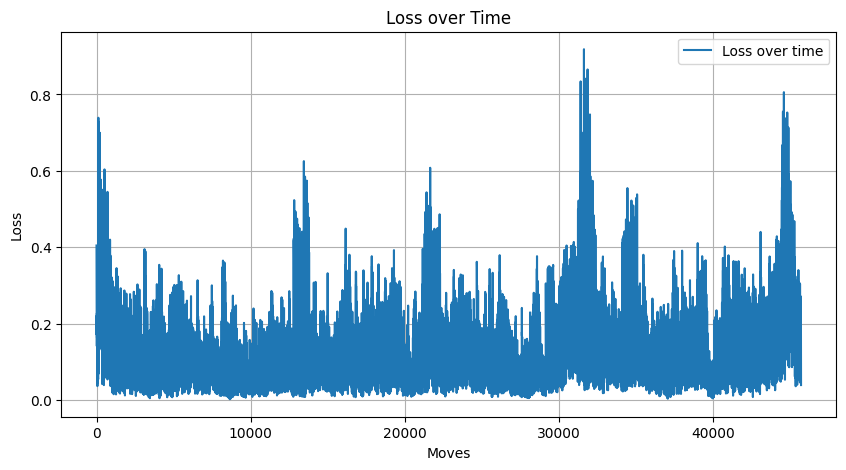

toad_self_play losses for epoch 1


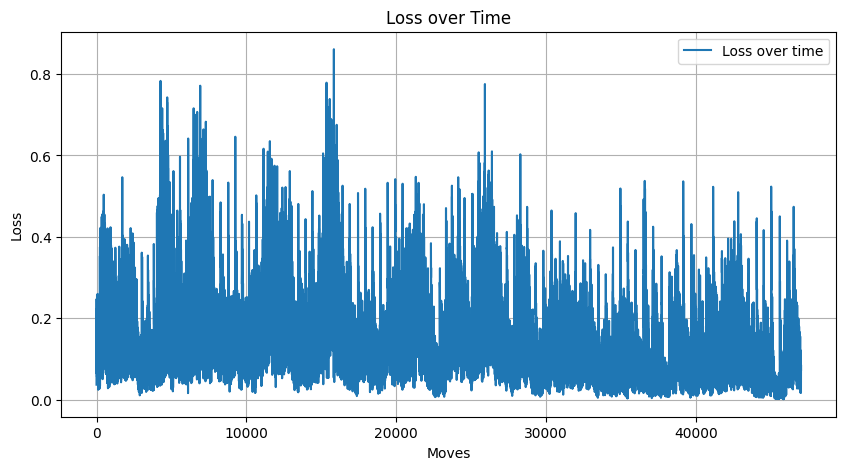

frog_self_play losses for epoch 1


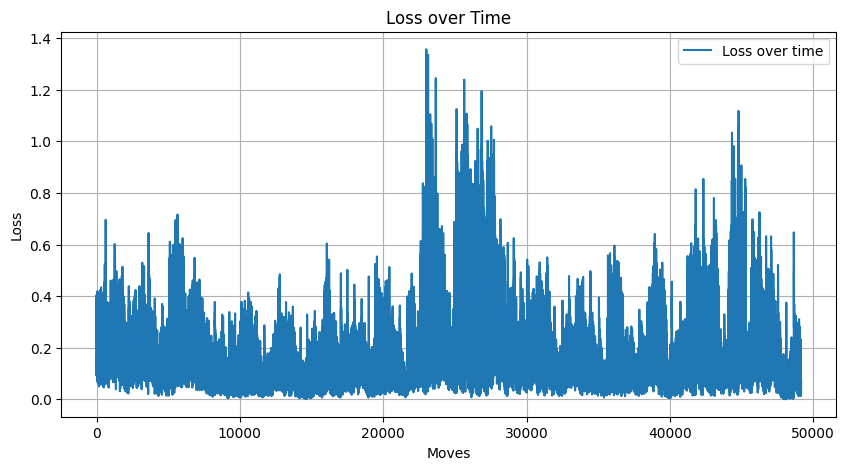

toad_self_play losses for epoch 2


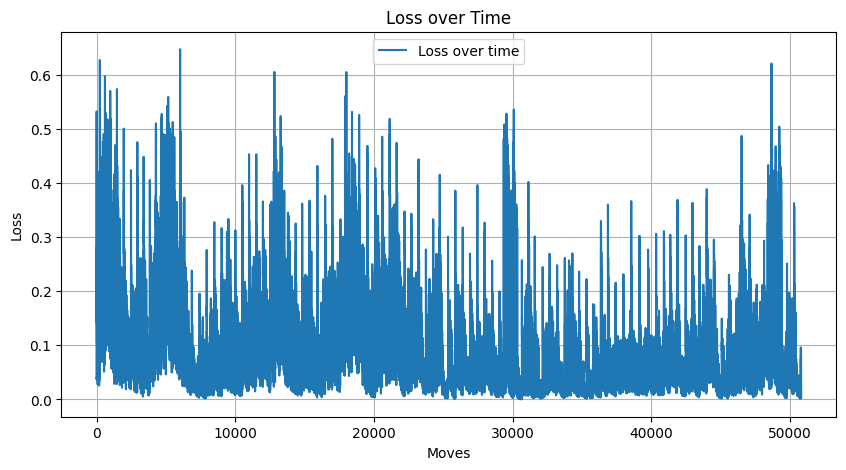

frog_self_play losses for epoch 2


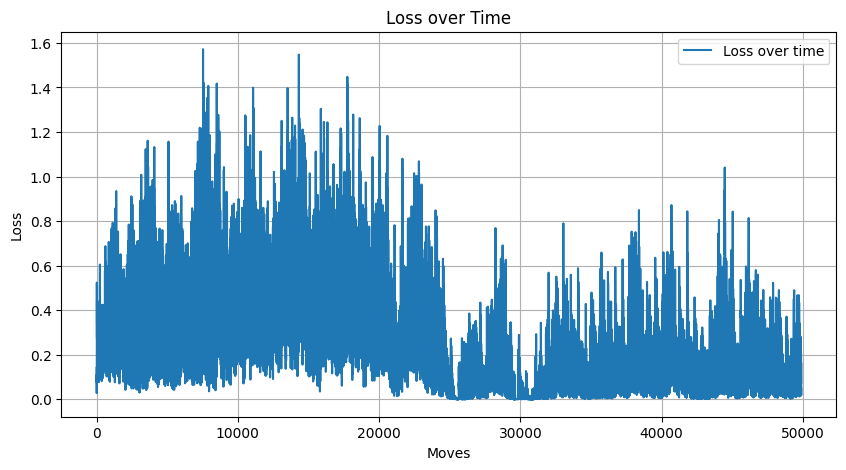

toad_self_play losses for epoch 3


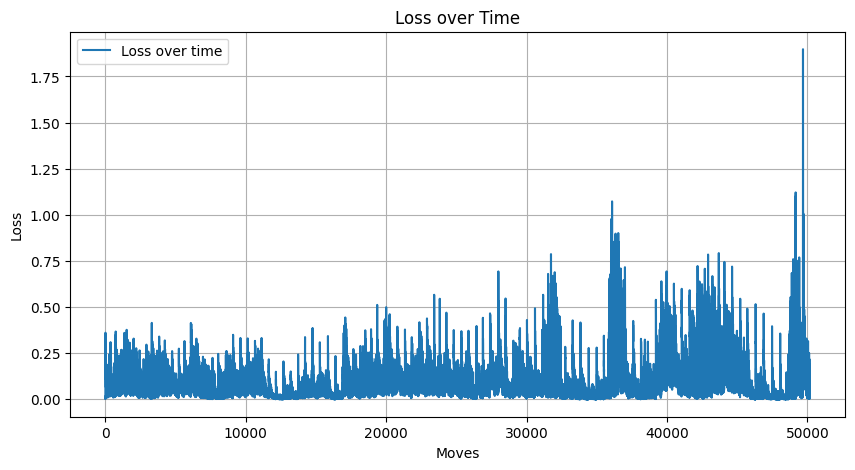

frog_self_play losses for epoch 3


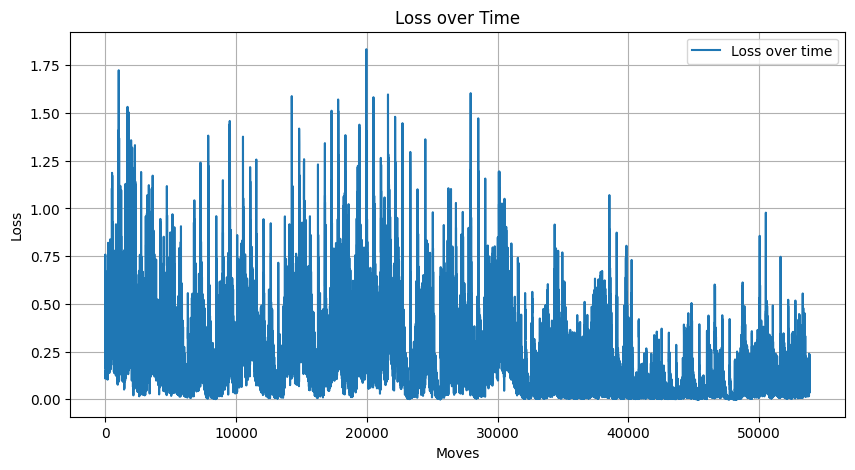

toad_self_play losses for epoch 4


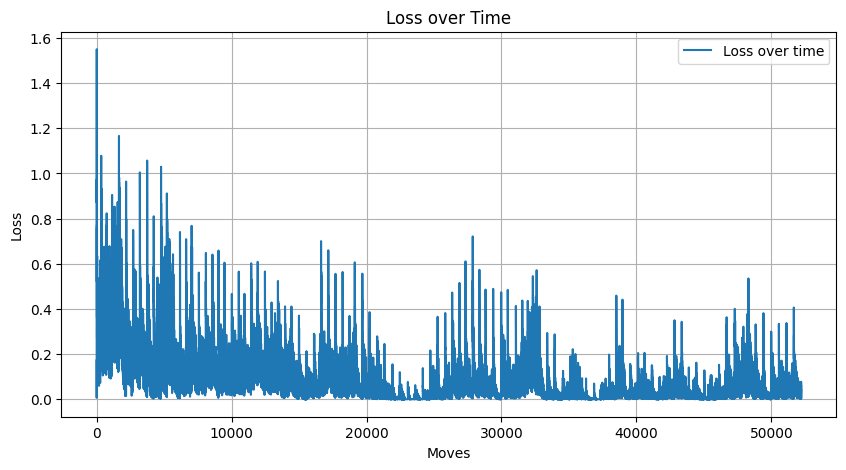

frog_self_play losses for epoch 4


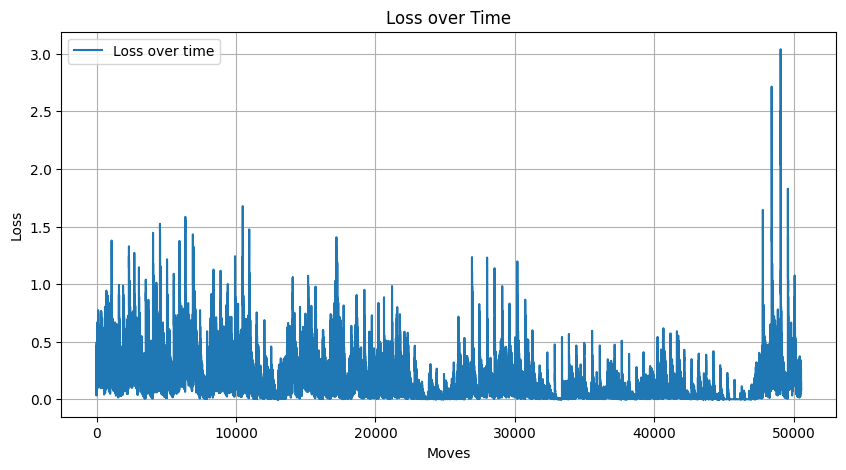

In [7]:
num_epochs = 5
# an epoch is a training session of both toad and frog
for epoch in range(num_epochs):
    losses = toad_self_play.train(opponent=frog_self_play, num_episodes=2000, save_model=True, start_epsilon=0.5 / (epoch + 1), end_epsilon=0, verbose=False)
    print(f"{toad_self_play.agent_name} losses for epoch {epoch}")
    plot_losses(losses)

    losses2 = frog_self_play.train(opponent=toad_self_play, num_episodes=2000, start_epsilon=0.5 / (epoch + 1), end_epsilon=0, verbose=False)
    print(f"{frog_self_play.agent_name} losses for epoch {epoch}")
    plot_losses(losses2)
    

Toads won 141 games (14.1%)
Frogs won 859 games (85.9%)


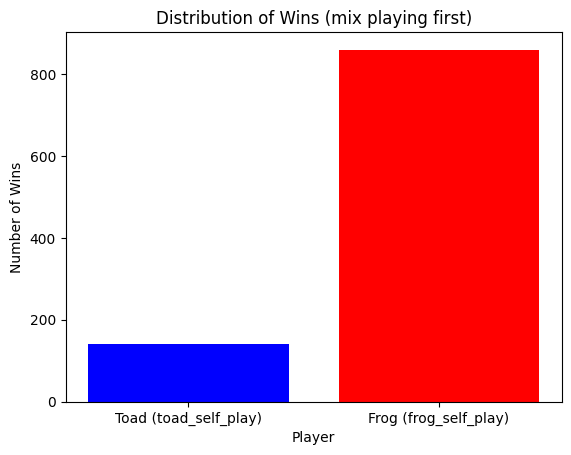

In [15]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, G, toad_self_play, frog_self_play,
                                starting_player=starting_player, verbose=False, plot=True)

Toads won 403 games (40.3%)
Frogs won 597 games (59.7%)


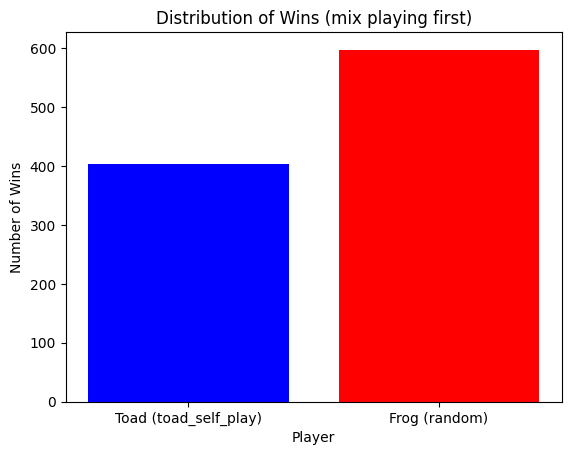

In [16]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, G, toad_self_play, random_frog,
                                starting_player=starting_player, verbose=False, plot=True)

Toads won 353 games (35.3%)
Frogs won 647 games (64.7%)


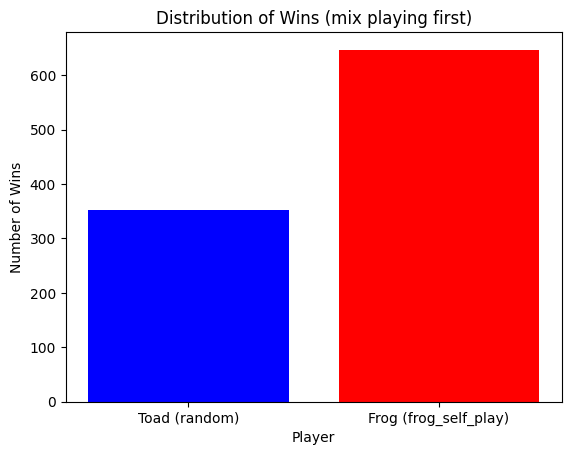

In [19]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, H, random_toad, frog_self_play,
                                starting_player=starting_player, verbose=False, plot=True)

In [18]:
run_game_loop(G, toad_self_play, random_frog)

Initializing game between toad_self_play as Toads and random as Frogs...
|T|T|T|T|T|T| | | | | | | | | |F|F|F|F|F|F|
toad_self_play makes move 1
|T|T|T|T|T| |T| | | | | | | | |F|F|F|F|F|F|
random makes move 1
|T|T|T|T|T| |T| | | | | | | |F| |F|F|F|F|F|
toad_self_play makes move 1
|T|T|T|T|T| | |T| | | | | | |F| |F|F|F|F|F|
random makes move 2
|T|T|T|T|T| | |T| | | | | | |F|F| |F|F|F|F|
toad_self_play makes move 1
|T|T|T|T|T| | | |T| | | | | |F|F| |F|F|F|F|
random makes move 3
|T|T|T|T|T| | | |T| | | | | |F|F|F| |F|F|F|
toad_self_play makes move 2
|T|T|T|T| |T| | |T| | | | | |F|F|F| |F|F|F|
random makes move 1
|T|T|T|T| |T| | |T| | | | |F| |F|F| |F|F|F|
toad_self_play makes move 1
|T|T|T|T| |T| | | |T| | | |F| |F|F| |F|F|F|
random makes move 4
|T|T|T|T| |T| | | |T| | | |F| |F|F|F| |F|F|
toad_self_play makes move 1
|T|T|T|T| |T| | | | |T| | |F| |F|F|F| |F|F|
random makes move 5
|T|T|T|T| |T| | | | |T| | |F| |F|F|F|F| |F|
toad_self_play makes move 1
|T|T|T|T| |T| | | | | |T| |F| |F|F|F|F|

True

In [20]:
me = HumanInput(G, FROG, 'logan')
run_game_loop(G, toad_self_play, me)

Initializing game between toad_rl as Toads and logan as Frogs...
|T|T| | | | |F|F|
toad_rl makes move 1
|T| |T| | | |F|F|
logan makes move 1
|T| |T| | |F| |F|
toad_rl makes move 2
| |T|T| | |F| |F|
logan makes move 1
| |T|T| |F| | |F|
toad_rl makes move 1
| |T| |T|F| | |F|
logan makes move 2
| |T| |T|F| |F| |
toad_rl makes move 1
| |T| | |F|T|F| |
logan makes move 1
| |T| |F| |T|F| |
toad_rl makes move 2
| | |T|F| |T|F| |
logan makes move 1
| |F|T| | |T|F| |
toad_rl makes move 1
| |F|T| | | |F|T|
logan makes move 2
| |F|T| | |F| |T|
toad_rl makes move 2
| |F| |T| |F| |T|
logan makes move 2
| |F| |T|F| | |T|
toad_rl makes move 2
| |F| | |F|T| |T|
logan makes move 1
|F| | | |F|T| |T|
toad_rl makes move 2
|F| | | |F| |T|T|
logan makes move 2
|F| | |F| | |T|T|
logan playing as Frogs wins in 18 moves!


False

For some reason the agents playing against each other became worse than random.